# Madhavi Ghanta
## Exercise 5.2
## DSC 530
## 07/06/23¶


# Exercise 5-1
In the BRFSS (see "The lognormal Distribtuion" on page 56), the distribtuion of heights 
is roughly normal with parameters  mu = 178 cm and sigma = 7.7cm for men, 
and mu=163 cm and sigma = 7.3 cm for women.

In order to join the Blue Man Group (http://bluemancasting.com), 
you have to be male and between 5'10" and 6'1" tall.

What percentage of the US male population is in this range?
Hint: use scipy.stats.norm.cdf


In [31]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
        
        download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")


Downloaded hinc.py
Downloaded hinc06.csv


In [8]:
# Importing scipy.stats for objects representing analytic distributions
import scipy.stats

# Data for distribution of heights with parameters µ = 178 cm and σ = 7.7 cm for men.
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [9]:
# dist is a random frozen variable capable of calculating a mean and sd
print(f"The mean of distribution is: {dist.mean()}")
print(f"The standard deviation is: {dist.std()}")
dist.mean(), dist.std()


The mean of dist is: 178.0
The standard deviation is: 7.7


(178.0, 7.7)

In [12]:
#Find percent of men between 5'10" and 6'1"
cm = 2.54
low_cm = 70 * cm
hi_cm = 73 * cm


low = dist.cdf(low_cm)
hi = dist.cdf(hi_cm)

low, hi, hi - low




#The "low" percentage marker identifies the percentage of people in the left tail of the distribution.
#We can state that 48.96% of men are less than 5'10", and that 83.23% are less than 6'1".
#However, to answer our question, we need to look at the space between the hi and low rankings. 
#To do this, we take the difference between hi and low to derive our answer.
#What percentage of men are between 5'10" and 6'1". 
between = hi-low
answer = '{:.0%}'.format(between)

print(f'{answer} of men are between 5\'10" and 6\'1"')

34% of men are between 5'10" and 6'1"


# Exercise 5-2
To get a feel for the Pareto distribution, let's see how different the world 
would be if the distribtuion of human height were Pareto.
With the paramters xm = 1 m and alpha = 1.7, we get a distribtuion with a reasonable minimum,
1 m, and median, 1.5m.

Plot this distribution. What is the mean human height in Pareto world? 
What fraction of the population is shorter than the mean? 
If there are 7 billion people in Pareto world, 
how many do we expect to be taller than 1 km?
How tall do we expect the tallest person to be?

In [13]:
# Using the scipy.stats.pareto, we will sett the parameters xm = 1 meter and α = 1.7.
alpha = 1.7
xmin = 1 
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

In [14]:
# Plot the distribution

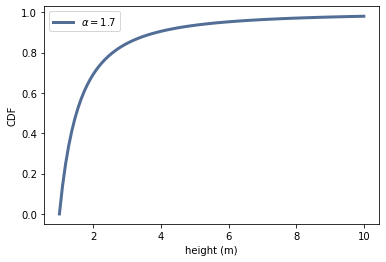

In [15]:
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(xlabel='height (m)', ylabel='CDF')

In [17]:
# What is the mean human height in Pareto world?

In [18]:
dist.mean()

2.428571428571429

In [19]:
# What fraction of people are shorter than the mean?

In [20]:
dist.cdf(dist.mean())

0.778739697565288

In [21]:
# Out of 7 billion people, how many do we expect to be taller than 1 km? You could use dist.cdf or dist.sf.

In [22]:
(1 - dist.cdf(1000)) * 7e9, dist.sf(1000) * 7e9

(55602.976430479954, 55602.97643069972)

In [23]:
# How tall do we expect the tallest person to be?

In [24]:
dist.sf(600000) * 7e9   

1.0525455861201714

# Exercise 6-1

The distribtuion of income is famously skewed to the right. In this exercise, we'll measure
how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census
Bureau to study income and related variables. Data collecte din 2013 is available from the Census Bureau's website.
I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it
to hinc06.csv, a CSV file you will find in the repository for this book. 
You will also find hinc2.py, which reads this file and transforms the data.

Thee data is in the form of a series of income ranges and the number of respondents who fell in each range.
The lowest range includes respondents who reported annual hosushold income "Under $5000." The highest range
includes respondents who made "$250,000 or more."

To estimate mean and other statistics from these data, we have to make sure some assumptions about the lower
and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which
shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each
range, and freq, which contains the number of respondents in each frame. 

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. 
The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 10^6,
or one million dollars. 

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of
respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

In [34]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import scipy.stats
import hinc
import thinkplot
import thinkstats2

income_df = hinc.ReadData()

def InterpolateSample(df, log_upper=6.0):
    """
    Makes a sample of log10 household income. 
    
    Assumes that log10 income is uniform in each range.
    
    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range
    
    returns: NumPy array of log10 household income
    """
    
    #compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)
    
    # get the lower bounds by shifting the upper bound and filling in
    #the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0
    
    #plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    #Use the freq column to generate the right number of values in each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)
        
    #Collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample
        

In [35]:
# Using InterpolateSample to model the data
log_sample = InterpolateSample(income_df, log_upper = 6.0)

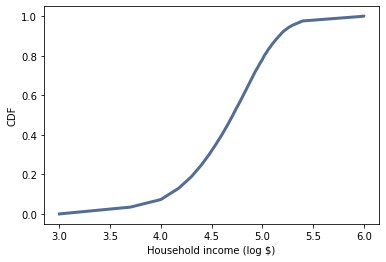

In [36]:
# Plot of the logged Household income CDF
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [37]:
# Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.

In [48]:
# Creating the RawMoment function for computing sums of powers
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [49]:
# Creating CentralMoment function for computing powers of distances from the mean.
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [50]:
# Creating the Pearson's median skewness function
def PearsonMedianSkewness(xs):
    median = np.median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [51]:
sample = np.power(10, log_sample)

Sample_Mean = sample.mean()
Sample_Median = np.median(sample)
Sample_Skew = skew(sample)
Sample_Pearson = PearsonMedianSkewness(sample)

values = [Sample_Mean, Sample_Median, Sample_Skew, Sample_Pearson]
  
print('\n'.join(map(str, values)))

74278.7075311872
51226.93306562372
4.949920244429584
0.7361105192428834


In [52]:
# What fraction of households report a taxable income below the mean?

In [53]:
cdf = thinkstats2.Cdf(sample)
percentofHouseholds = cdf.Prob(Sample_Mean)
print(round(percentofHouseholds, 2)*100, "percent of households report a taxable income below the mean")

66.0 percent of households report a taxable income below the mean


How do the results depend on the assumed upper bound? - It is based on the assumption that the highest income is one million dollars. However, we know that this is not correct. We know that there are individuals making millions of dollars a year. If we were to include their income in the distribution, the skew would certailty look alot different. Meaning that the results do depend on the assumed upper bound. Without more testing, we do not know exzactly how much the skew is dependent on the upper bound for this particular data set.